<a href="https://colab.research.google.com/github/manu675/Data_Mining_Cup_Prudsys_21/blob/master/eda_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Cup Prudsys 2021


Task: https://www.data-mining-cup.com/dmc-2021/?utm_source=dmc&utm_medium=email&utm_campaign=newsletter

**Starting points:**   
https://machinelearningmastery.com/recommender-systems-resources/

https://medium.com/@chaitanyarb619/recommendation-systems-a-walk-trough-33587fecc195

https://heartbeat.fritz.ai/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831

**Potential models**:
- Matrix Factorization (Singular Value Decomposition)
- Deep Learning (NNs)
- Clustering (KNN)

**Potential evaluation/comparison metrics for recommender systems:**

https://github.com/statisticianinstilettos/recmetrics

Precision: popular evaluation metric for recommender systems. It simply looks at the top K recommendations and calculate what proportion of those recommendations are actually relevant to the user.

Recall: the proportion of items that were found in the top K recommendations.


**ToDo's for the presentation:**  

Summary about task and data   
Challenges (Data Modeling)  
Subproblems and responsibilities within the team  
First EDA insights: # of features, summary stats, plots  


Implementation Tutorial:  
https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

In [1]:
# importing libaries:

# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tuning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from scipy.stats import loguniform, randint, uniform

# specific libraries
import nltk # natural language toolkit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel 




## Reading in the data

In [2]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()

Saving evaluation.csv to evaluation (1).csv


In [3]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()

Saving items.csv to items (1).csv


In [4]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()

Saving transactions.csv to transactions (1).csv


# Exploratory Data Analysis


https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

In [5]:
eval_df = pd.read_csv("evaluation.csv", sep =";")

In [6]:
items_df = pd.read_csv("items.csv", sep ="|")

In [7]:
transactions_df = pd.read_csv("transactions.csv", sep ="|")

In [8]:
eval_df.head()

,itemID
0,12
1,45274
2,10104
3,41371
4,14015


In [9]:
eval_df.shape

(1000, 1)

In [10]:
items_df.head()

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"


In [11]:
items_df.shape

(78030, 6)

In [12]:
transactions_df.head()

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [13]:
transactions_df.shape

(365143, 5)

In [14]:
df_combined = pd.merge(items_df, transactions_df, on="itemID")

df_combined.head()
                       
                     

,itemID,title,author,publisher,main topic,subtopics,sessionID,click,basket,order
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],0,1,0,0
1,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],89272,1,0,0
2,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],183856,1,0,0
3,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",1,1,0,0
4,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",771,1,0,0


# Data Insights

In [15]:
# dimensions and No. of features
df_combined.shape

(365143, 10)

In [16]:
df_combined.columns

Index(['itemID', 'title', 'author', 'publisher', 'main topic', 'subtopics',
       'sessionID', 'click', 'basket', 'order'],
      dtype='object')

In [17]:
# data types (5 integer variables)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365143 entries, 0 to 365142
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   itemID      365143 non-null  int64 
 1   title       365143 non-null  object
 2   author      323809 non-null  object
 3   publisher   365142 non-null  object
 4   main topic  364248 non-null  object
 5   subtopics   365143 non-null  object
 6   sessionID   365143 non-null  int64 
 7   click       365143 non-null  int64 
 8   basket      365143 non-null  int64 
 9   order       365143 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 30.6+ MB


In [18]:
df_combined["basket"].unique()

array([  0,   1,   2,   3,   4,   7,  10,  23,   6,  20,   5,  51,  43,
        36, 119,   9,   8,  25,  14, 287, 268,  18,  38,  26,  11,  30,
        24,  98,  52,  65,  15,  28, 182,  21,  80, 293,  58, 100,  22,
        12,  13,  29,  16,  48, 150])

In [19]:
df_combined["basket"].unique()


array([  0,   1,   2,   3,   4,   7,  10,  23,   6,  20,   5,  51,  43,
        36, 119,   9,   8,  25,  14, 287, 268,  18,  38,  26,  11,  30,
        24,  98,  52,  65,  15,  28, 182,  21,  80, 293,  58, 100,  22,
        12,  13,  29,  16,  48, 150])

In [20]:
df_combined["order"].unique()

array([ 0,  1,  2,  3,  4,  7, 10,  5, 27, 25, 26, 21, 12, 11, 15, 22, 23,
       14, 28,  6, 13, 20, 19])

In [21]:
# summary stats (for integer variables)
df_combined.describe()

,itemID,sessionID,click,basket,order
count,365143.000000,365143.000000,365143.000000,365143.000000,365143.000000
mean,40051.292307,139586.939175,1.233180,0.141202,0.048403
std,22493.347334,80795.207871,1.069996,1.107574,0.268717
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20713.000000,69459.500000,1.000000,0.000000,0.000000
50%,40692.000000,139608.000000,1.000000,0.000000,0.000000
75%,58916.000000,209750.500000,1.000000,0.000000,0.000000
max,79066.000000,279354.000000,118.000000,293.000000,28.000000


In [22]:
# detecting and counting missing values 
df_combined.isnull().sum() # number of NaNs per column

itemID            0
title             0
author        41334
publisher         1
main topic      895
subtopics         0
sessionID         0
click             0
basket            0
order             0
dtype: int64

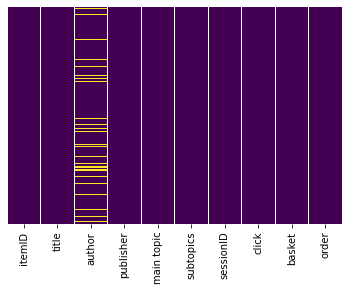

In [23]:
# visualization of missing values
sns.heatmap(df_combined.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [24]:
# list of categorical features
cat_feature_mask = df_combined.dtypes == object # boolean test (mask) of whether the col is of "object type" or not
cat_feature_mask

itemID        False
title          True
author         True
publisher      True
main topic     True
subtopics      True
sessionID     False
click         False
basket        False
order         False
dtype: bool

In [25]:
# filter categorical columns using the mask and turn it into a list
cat_list = df_combined.columns[cat_feature_mask].to_list()

cat_list

['title', 'author', 'publisher', 'main topic', 'subtopics']

In [26]:
# list of numerical features
num_feature_mask = df_combined.dtypes != object # boolean test of whether the col is not of the type object 
num_feature_mask

itemID         True
title         False
author        False
publisher     False
main topic    False
subtopics     False
sessionID      True
click          True
basket         True
order          True
dtype: bool

In [27]:
# filter categorical columns using the mask and turn it into a list
num_list = df_combined.columns[num_feature_mask].to_list()

num_list

['itemID', 'sessionID', 'click', 'basket', 'order']

In [28]:
df_combined[["author","title"]].value_counts()

author                    title                                                                                   
Joanne K. Rowling         Harry Potter Box Set: The Complete Collection (Children's Paperback)                        2291
Ben Aaronovitch           Der Geist in der British Library und andere Geschichten aus dem Folly                       1775
Insight Editions, Panini  Aus den Filmen zu Harry Potter: Eine magische Reise: Alles für deine Fahrt nach Hogwarts    1749
Gecko Keck                Die Kunst des Zeichnens für Kinder                                                          1290
Leigh Bardugo             Goldene Flammen                                                                             1276
                                                                                                                      ... 
Scott Sonneborn           Shell Shocker                                                                                  1
Scott Reintgen          

In [29]:
df_combined[["publisher", "main topic"]].value_counts()

publisher                  main topic
Usborne Verlag             YBG           6874
Klett-Cotta Verlag         FMB           6709
Ars Edition GmbH           YBG           6703
Bloomsbury UK              YFH           6584
LYX                        FMR           5442
                                         ... 
G & G Verlagsgesellschaft  YBC              1
                           Y                1
Fulton Books               FMW              1
                           FMH              1
.                          FLS              1
Length: 7618, dtype: int64

In [30]:
df_combined["main topic"].value_counts()

FMB     27851
YFH     24286
YBG     23580
YFHR    16675
FMR     16408
        ...  
YXFS        1
MQR         1
CBVS        1
VSA         1
QRM         1
Name: main topic, Length: 605, dtype: int64

In [31]:
# correlation matrix (no high positive nor negative cross-correlations)
df_combined.corr()

,itemID,sessionID,click,basket,order
itemID,1.000000,-0.001154,0.003196,-0.004658,0.002651
sessionID,-0.001154,1.000000,-0.001762,-0.001147,0.004193
click,0.003196,-0.001762,1.000000,0.024665,-0.134103
basket,-0.004658,-0.001147,0.024665,1.000000,0.122249
order,0.002651,0.004193,-0.134103,0.122249,1.000000


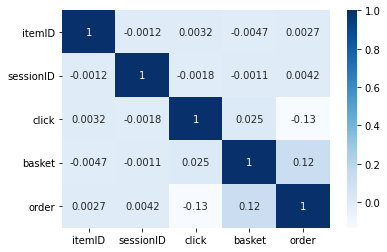

In [32]:
# visualization of the correlation matrix
# (Dark shades represents positive correlation while lighter shades represents negative correlation.)
plt.figure(figsize=(6,4))
sns.heatmap(df_combined.corr(),cmap='Blues',annot=True) 
# annot=True displays cross correlation values in the matrix cells

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

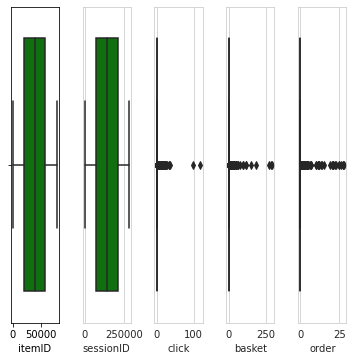

In [33]:
# checking for outliers (in the numerical variables)
l = df_combined[num_list].columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_combined[l[i]],color='green',orient='v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

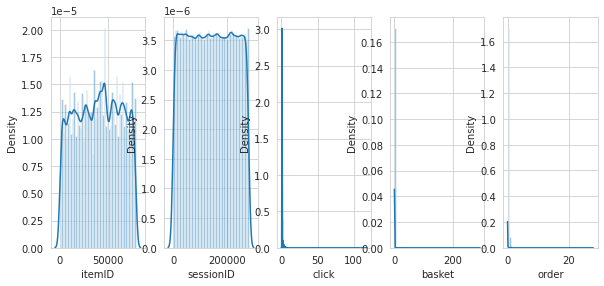

In [34]:
# checking distribution skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_combined[l[i]],kde=True) 

# Feature Engineering

**text feature extraction:** converting text data input into numerical vectors to perform machine learning  

*Bag of words*: converting text data into numerical feature vectors with a fixed size:
- step 1) tokenizing: assign a fixed ID to each word  
- step 2) counting: count the number of occurences of each word  
- step 3) storing: store as a value feature

In [20]:
# main topic feature
items_df["main topic"]

0         YFB
1         AGZ
2         YFH
3          YB
4        WFTM
         ... 
78025     YFA
78026     FMB
78027     YFU
78028     YFC
78029      FL
Name: main topic, Length: 78030, dtype: object

In [21]:
items_df["main topic"].value_counts()

FM       6536
YFB      5104
FL       4576
YFH      4149
YFC      3468
         ... 
YNNH5       1
YR          1
CBW         1
WHP         1
QRST        1
Name: main topic, Length: 699, dtype: int64

In [22]:
# subtopics feature
items_df["subtopics"]

0                                [5AH]
1        [5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]
2                            [5AP,FBA]
3                 [5AC,5AD,YBG,YBL,YF]
4         [WD,WFTM,YBG,YBL,YBLD,YBLN1]
                     ...              
78025                            [YFJ]
78026                               []
78027                               []
78028                        [YFG,YFH]
78029                               []
Name: subtopics, Length: 78030, dtype: object

In [23]:
items_df["subtopics"].value_counts()

[]                              36904
[YF]                             1425
[FL]                             1076
[YFQ]                             854
[FM]                              841
                                ...  
[5AL,1FPJ,YFH]                      1
[5AN,4CL,YNC]                       1
[5AL,FBA,FM,YFB]                    1
[5AM,FJMS,YFCW,YFT,YFY,3MPB]        1
[5JA,FMR,FMX,FRD]                   1
Name: subtopics, Length: 11381, dtype: int64

In [24]:
# title feature
items_df["title"].head()

0               Princess Poppy: The Big Mix Up
1               Einfach zeichnen! Step by Step
2                                  Red Queen 1
3           Meine Kindergarten-Freunde (Pirat)
4    Mein großes Schablonen-Buch - Wilde Tiere
Name: title, dtype: object

In [25]:
items_df["title"].value_counts()

The Secret Garden                    25
Anne of Green Gables                 19
Alice's Adventures in Wonderland     18
The Railway Children                 17
Peter Pan                            16
                                     ..
Drew Is Just Like You!                1
Take Me Back to Oz                    1
Flat Stanley and the Fire Station     1
Die Legende vom Feuermal              1
The Waisting of Time                  1
Name: title, Length: 72128, dtype: int64

# (1) Vectorization of the feature containing text data

In [26]:
# instantiating the CountVectorizer as an object
vectorizer = CountVectorizer()

In [27]:
bag_of_words = vectorizer.fit(items_df["title"])

bag_of_words

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
bag_of_words = vectorizer.transform(items_df["title"])

print(bag_of_words) # (tuple) frequency of words

  (0, 4741)	1
  (0, 25672)	1
  (0, 30413)	1
  (0, 30745)	1
  (0, 38985)	1
  (0, 41085)	1
  (1, 6247)	1
  (1, 11630)	1
  (1, 37222)	2
  (1, 44408)	1
  (2, 31324)	1
  (2, 31944)	1
  (3, 14922)	1
  (3, 21236)	1
  (3, 24997)	1
  (3, 29990)	1
  (4, 5978)	1
  (4, 16986)	1
  (4, 24996)	1
  (4, 33824)	1
  (4, 39248)	1
  (4, 43243)	1
  (5, 13000)	1
  (5, 15792)	1
  (6, 24997)	1
  :	:
  (78023, 26505)	1
  (78023, 27995)	1
  (78023, 37412)	1
  (78023, 38985)	2
  (78023, 39975)	1
  (78024, 10767)	1
  (78024, 27995)	1
  (78024, 30582)	1
  (78024, 38985)	1
  (78025, 13301)	1
  (78025, 38389)	1
  (78025, 39348)	1
  (78026, 9677)	1
  (78026, 15430)	1
  (78027, 2164)	1
  (78027, 9690)	1
  (78027, 23174)	1
  (78027, 23470)	1
  (78027, 38985)	1
  (78028, 2844)	1
  (78028, 12986)	1
  (78028, 38985)	1
  (78029, 23052)	1
  (78029, 38985)	1
  (78029, 42277)	1


In [29]:
# print the counts of repeated words
print(vectorizer.vocabulary_)


{'princess': 30745, 'poppy': 30413, 'the': 38985, 'big': 4741, 'mix': 25672, 'up': 41085, 'einfach': 11630, 'zeichnen': 44408, 'step': 37222, 'by': 6247, 'red': 31944, 'queen': 31324, 'meine': 24997, 'kindergarten': 21236, 'freunde': 14922, 'pirat': 29990, 'mein': 24996, 'großes': 16986, 'schablonen': 33824, 'buch': 5978, 'wilde': 43243, 'tiere': 39248, 'ewig': 13000, 'geliebt': 15792, 'sticker': 37327, 'unsterblich': 40996, '01': 10, 'tor': 39637, 'der': 9739, 'dämmerung': 11283, '02': 15, 'nacht': 26687, 'pedro': 29265, 'und': 40722, 'die': 10042, 'bettler': 4629, 'von': 42202, 'cartagena': 6748, 'freundebuch': 14925, 'einhorn': 11642, 'paradies': 28911, 'haushörerin': 17709, 'reiter': 32135, 'schwarzen': 34326, 'sonne': 36343, 'was': 42603, 'ist': 19888, 'quiz': 31417, 'autos': 3423, 'länder': 23764, 'welt': 42907, 'fußball': 15221, 'spring': 36865, 'in': 19297, 'eine': 11625, 'pfütze': 29675, 'perfekter': 29458, 'frühling': 15078, 'sommer': 36290, 'wendebuch': 42987, 'dann': 9287, 

# (2) TF-IDF Transformation

TF-IDF: "term frequency - inverse document frequency
Text mining technique to compute a weight for each word (=term) representing its importance in the docuement

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

**Parameters of the TfidfVectorizer function**:  

analyzer : str, {'word', 'char', 'char_wb'} 
    Whether the feature should be made of word or character n-grams.
    Option 'char_wb' creates character n-grams only from text inside 
   word boundaries; n-grams at the edges of words are padded with space.

ngram_range : tuple (min_n, max_n), default=(1, 1)
    The lower and upper boundary of the range of n-values for different
    n-grams to be extracted  




In [8]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english',)
tfidf_matrix = tf.fit_transform(items_df['title'])




In [9]:
# the TFIDF matrix contains the TFIDF score of each word
print(tfidf_matrix)

  (0, 183435)	0.3868748151987105
  (0, 185625)	0.3868748151987105
  (0, 26163)	0.3868748151987105
  (0, 183434)	0.3868748151987105
  (0, 185624)	0.3562406499469887
  (0, 160290)	0.31532641006743717
  (0, 25953)	0.2129822725052505
  (0, 183431)	0.2911834241151442
  (0, 185355)	0.21171709666029156
  (1, 258897)	0.35166685315610147
  (1, 77147)	0.35166685315610147
  (1, 217716)	0.3182797925203449
  (1, 258896)	0.35166685315610147
  (1, 77146)	0.33934468245973803
  (1, 217693)	0.5348145867970574
  (1, 258861)	0.22086540142533298
  (1, 77124)	0.27879430685664996
  (2, 191514)	0.7173026397936876
  (2, 188140)	0.5019914236542204
  (2, 191380)	0.48319926895910803
  (3, 129702)	0.4313218996560269
  (3, 155715)	0.3136484602955953
  (3, 94590)	0.4162086695493438
  (3, 129685)	0.3113421281460829
  (3, 155714)	0.3136484602955953
  :	:
  (78023, 233446)	0.20099007615603262
  (78023, 164560)	0.16464628123121466
  (78023, 218999)	0.2053030417261563
  (78024, 71797)	0.6852108693910747
  (78024, 184341)

In [10]:
tfidf_matrix.shape

(78030, 261398)

Cosine Similarity: The ultimate reason behind using cosine is that the value of cosine will increase as the angle between vectors with decreases, which signifies more similarity.

In [11]:
# calcluating cosine similarities: (trying a subset of the data first to prevent the session from crashing)
cosine_similarities = linear_kernel(tfidf_matrix[1:201], tfidf_matrix[1:201]) 

cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
print(tfidf_matrix[1:201])

  (0, 258897)	0.35166685315610147
  (0, 77147)	0.35166685315610147
  (0, 217716)	0.3182797925203449
  (0, 258896)	0.35166685315610147
  (0, 77146)	0.33934468245973803
  (0, 217693)	0.5348145867970574
  (0, 258861)	0.22086540142533298
  (0, 77124)	0.27879430685664996
  (1, 191514)	0.7173026397936876
  (1, 188140)	0.5019914236542204
  (1, 191380)	0.48319926895910803
  (2, 129702)	0.4313218996560269
  (2, 155715)	0.3136484602955953
  (2, 94590)	0.4162086695493438
  (2, 129685)	0.3113421281460829
  (2, 155714)	0.3136484602955953
  (2, 181187)	0.3903724320331764
  (2, 94504)	0.2556122345180068
  (2, 129647)	0.2729642878264257
  (2, 155588)	0.2341140227828764
  (3, 34265)	0.3053353840611226
  (3, 200916)	0.3164226204803561
  (3, 107210)	0.2913671181205054
  (3, 155085)	0.2913671181205054
  (3, 251960)	0.26523914537894844
  :	:
  (195, 5843)	0.3125261915462817
  (195, 84755)	0.2619729898843293
  (195, 57708)	0.10362119759112956
  (196, 14804)	0.446140729801007
  (196, 226524)	0.42573100106955

In [13]:
cosine_similarities.shape

(200, 200)

In [20]:
similar_indices = cosine_similarities[idx].argsort()[:-100:-1]

similar_indices

IndexError: ignored

In [133]:
 similar_items = [(cosine_similarities[idx][i], items_df['title'][i]) for i in similar_indices]

 similar_items

[(1.0, 'Shadowmarch 1. Die Grenze'),
 (0.0, 'Dangerous Boys - Wenn wir uns verlieren'),
 (0.0, 'An Absolutely Remarkable Thing'),
 (0.0, 'Die Hexenholzkrone 1'),
 (0.0, 'Das Spiel der Götter 17'),
 (0.0, 'Das Spiel der Götter 19'),
 (0.0, 'Das Spiel der Götter 18'),
 (0.0, 'Trötsch Mein erstes Ausmalbuch'),
 (0.0,
  'Aus den Filmen zu Harry Potter: Eine magische Reise: Alles für deine Fahrt nach Hogwarts'),
 (0.0, 'Endlich große Schwester'),
 (0.0, 'Dangerous Boys - Wenn ich dir vertraue'),
 (0.0, 'Kiss Me Twice - Kiss the Bodyguard 2'),
 (0.0, 'Dangerous Boys - Wenn du mich findest'),
 (0.0, 'Mein erstes Bremen-Buch'),
 (0.0, 'Die Chronik des Eisernen Druiden 08. Aufgespießt'),
 (0.0, 'Die Chroniken von Narnia - Illustrierte Gesamtausgabe'),
 (0.0, 'Die Spiderwick Geheimnisse 02 - Gefährliche Suche'),
 (0.0, 'Die Spiderwick Geheimnisse 01 - Eine unglaubliche Entdeckung'),
 (0.0, 'Der Triumph der Zwerge'),
 (0.0, 'Brothers of the Wind'),
 (0.0, 'It Only Happens in the Movies'),
 (0.0, 

In [18]:
# calculating the cosine similarity of each item with every other item in the dataset, 
# arranging them according to their similarity with item i, and then storing the values in the object results
results={}
for idx, row in items_df.iterrows(): # iterrows(): Iterate over DataFrame rows as (index, Series) pairs
  similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
  similar_items = [(cosine_similarities[idx][i], items_df['itemID'][i]) for i in similar_indices] 

  results[row['itemID']] = similar_items[1:]



IndexError: ignored

In [143]:
cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# (3) Making a recommendation

In [15]:
def item(id):  
  return items_df.loc[items_df['itemID'] == id]['title'].tolist()[0].split(' - ')[0] # Just reads the results out of the dictionary.def 



In [16]:
def recommend(item_id, num):
  print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
  print("-------") 
  recs = results[item_id][:num]   
  for rec in recs: 
    print("Recommended: " + item(rec[1]) + " (score:" +  str(rec[0]) + ")")


In [21]:
recommend(item_id=12, num=5) # num = number of recommendations

Recommending 5 products similar to Breathtaking...
-------


KeyError: ignored